In [1]:
import os
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

import plotly.graph_objects as go

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# function for plotting time series
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.figure(figsize=(60,20))
    plt.plot(x, y, 'k-', label="actual")
#     plt.figure(figsize=(30,10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.legend();

In [3]:
# df_2014 = pd.read_csv('HistoricalEMSHourlyLoad-2014.csv', sep=',', header=0)
# df_2015 = pd.read_csv('HistoricalEMSHourlyLoad-2015.csv', sep=',', header=0)
df_2016 = pd.read_csv('HistoricalEMSHourlyLoad-2016.csv', sep=',', header=0)
df_2017 = pd.read_csv('HistoricalEMSHourlyLoad-2017.csv', sep=',', header=0)
df_2018 = pd.read_csv('HistoricalEMSHourlyLoad-2018.csv', sep=',', header=0)
df_2019_01 = pd.read_csv('HistoricalEMSHourlyLoadforJanuary2019.csv', sep=',', header=0)

In [4]:
for dataframe in [df_2016, df_2017, df_2018]:
    dataframe['PGE'] = dataframe['PGE'].astype(float)
    dataframe['Dates'] =  pd.to_datetime(dataframe['Dates'])
    
df = pd.concat([df_2016, df_2017, df_2018])

df_pge = df[['Dates', 'PGE']]
df_pge.head()

,Dates,PGE
0,2016-01-01 00:00:00,10554.0
1,2016-01-01 01:00:00,10210.0
2,2016-01-01 02:00:00,9941.0
3,2016-01-01 03:00:00,9793.0
4,2016-01-01 04:00:00,9802.0


In [5]:
df_pge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 8759
Data columns (total 2 columns):
Dates    26304 non-null datetime64[ns]
PGE      26304 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 616.5 KB


In [6]:
df_pge.set_index('Dates', inplace=True)

In [7]:
df_pge.head()

,PGE
Dates,
2016-01-01 00:00:00,10554.0
2016-01-01 01:00:00,10210.0
2016-01-01 02:00:00,9941.0
2016-01-01 03:00:00,9793.0
2016-01-01 04:00:00,9802.0


In [8]:
df_pge_daily = df_pge.resample('D').sum()
df_pge_daily.head()

,PGE
Dates,
2016-01-01,261745.0
2016-01-02,262607.0
2016-01-03,254196.0
2016-01-04,274273.0
2016-01-05,276651.0


In [9]:
df_pge_daily.tail()

,PGE
Dates,
2018-12-27,253671.600038
2018-12-28,257766.930766
2018-12-29,248705.445720
2018-12-30,247055.037254
2018-12-31,247910.019588


In [10]:
times = df_pge_daily.index

In [11]:
pge_daily = df_pge_daily['PGE']

In [57]:
# import plotly.graph_objects as go

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=times, y=pge_daily, name='Actual',
                         line=dict(color='royalblue', width=1)))
fig.update_layout(title='PG&E Power Usage 2016 - 2019',
                   yaxis_title='Power Usage')
fig.show()
fig.write_image("actual_daily.png")

In [13]:
df_pge_monthly = df_pge.resample('M').sum()
month_times = df_pge_monthly.index

In [14]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month_times, y=df_pge_monthly.PGE, name='Actual',
                         line=dict(color='royalblue', width=2)))
fig.update_layout(title='Actual Power Usage (Monthly)',
                   yaxis_title='Power Usage (Gigaawatts)')
fig.show()
fig.write_image("actual_monthly.png")

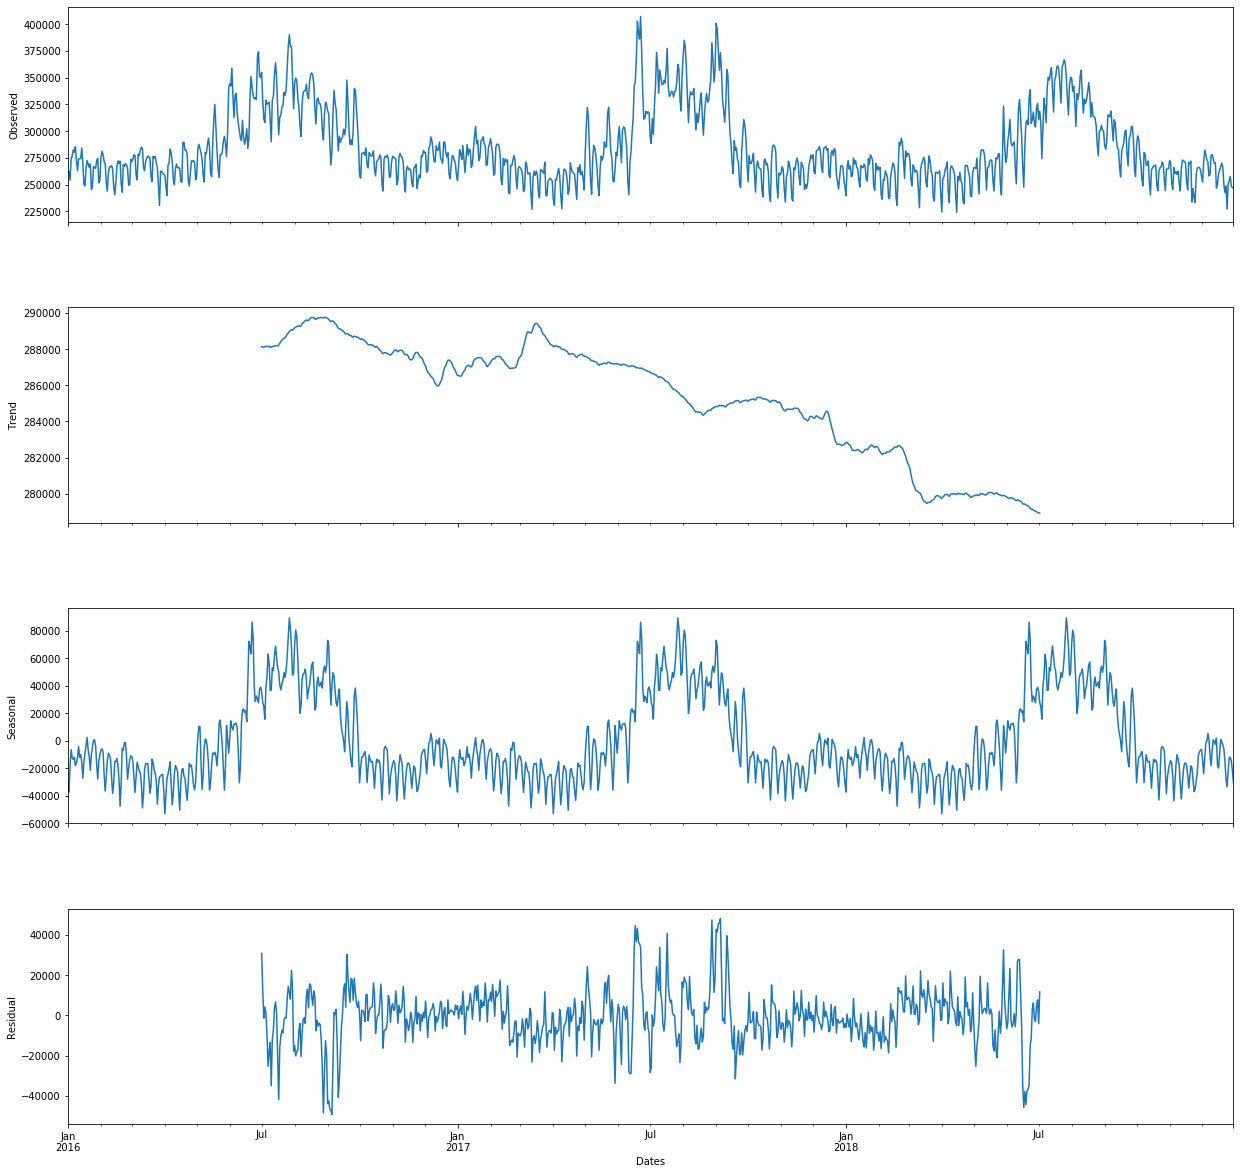

In [15]:
seas_d=sm.tsa.seasonal_decompose(pge_daily, model='additive', freq=365);
# plt.figure(figsize=(60,20))
fig=seas_d.plot()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()

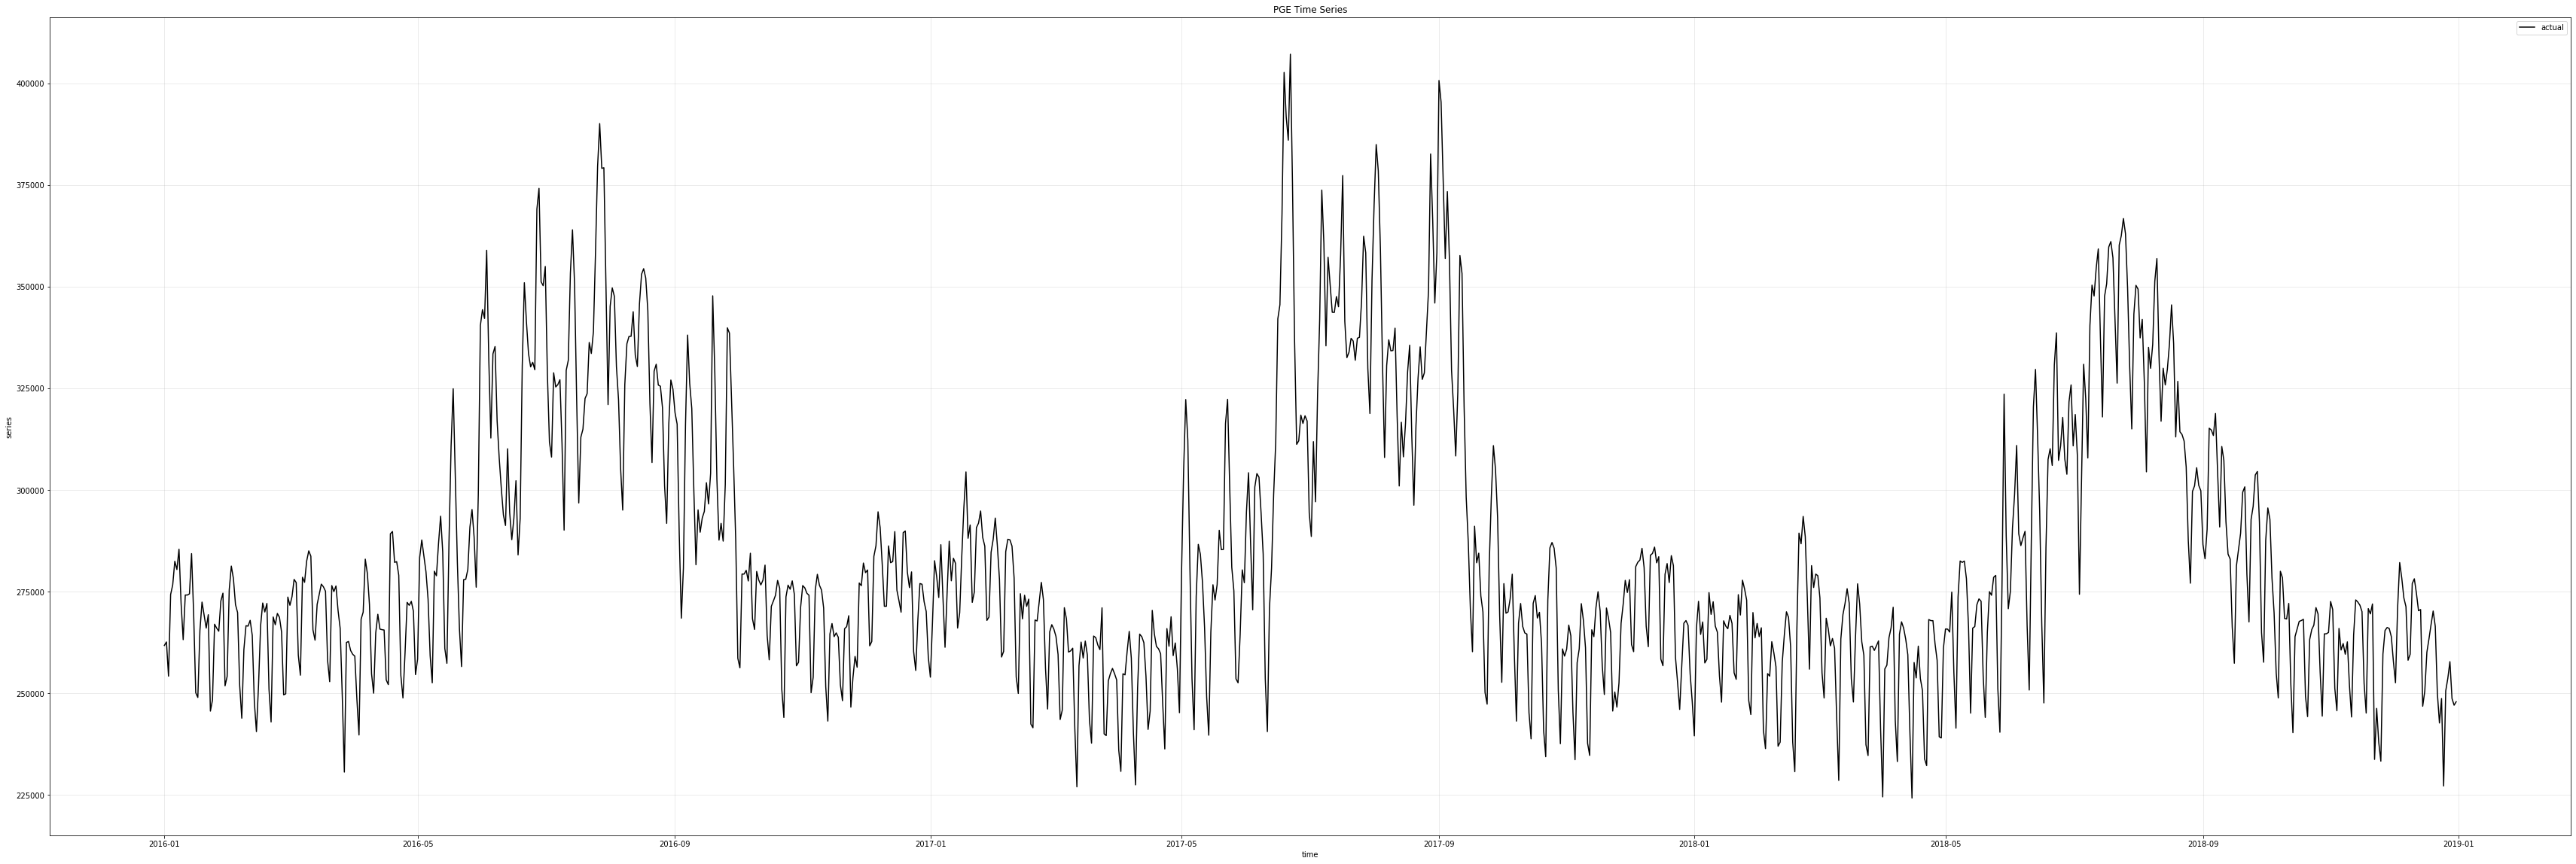

In [56]:
run_sequence_plot(times, pge_daily, title='PGE Time Series')

In [17]:
times = df_pge_daily.index

In [18]:
# Augmented Dickey Fuller test to see if the time series is stationary

from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(pge_daily)
print(f"adf:     {adf}")
print(f"p-value:  {pvalue}")

adf:     -2.507020402654893
p-value:  0.11377551592496726


In [19]:
# differencing once makes time series stationary

pge_daily_diff = pge_daily.diff()[1:]
pge_daily_diff_diff = pge_daily.diff().diff()[2:]

In [20]:
# Augmented Dickey Fuller test to see if the differenced time series is stationary
# p-value is basically 0 so stationary

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(pge_daily_diff)
print(f"adf:     {adf}")
print(f"p-value:  {pvalue}")

adf:     -8.802616413455457
p-value:  2.0924189623432552e-14


In [21]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=times[1:], y=pge_daily_diff, name='differenced',
                         line=dict(color='royalblue', width=1)))
fig.update_layout(title='Differenced Time Series',
                   yaxis_title='Power Difference (Gigawatts)')
fig.show()
fig.write_image("actual_diff.png")

In [22]:
# plot differenced time series
# run_sequence_plot(times[1:], pge_daily_diff, title='PGE Time Series differenced')

In [23]:
print(f"variance: {pge_daily_diff.var():15.2f}")
print(f"mean:     {pge_daily_diff.mean():>15.2f}")

variance:    207638557.55
mean:              -12.63


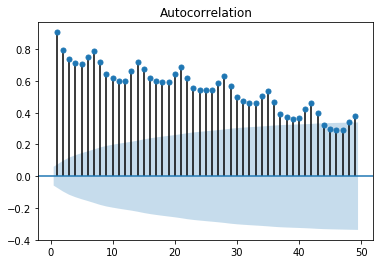

In [24]:
# ACF plot with no differencing
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_acf(pge_daily, lags=range(1,50), alpha=0.05)

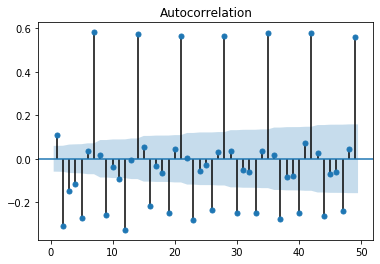

In [25]:
# ACF plot with order 1 differencing

pge_daily_diff = pge_daily.diff()[1:]
fig = plot_acf(pge_daily_diff, lags=range(1,50), alpha=0.05)

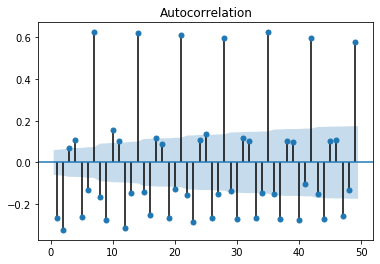

In [26]:
# ACF plot with order 2 differencing
# lag-1 autocorrelation went negative - no need for more differencing
pge_daily_diff_diff = pge_daily.diff().diff()[2:]
fig = plot_acf(pge_daily_diff_diff, lags=range(1,50), alpha=0.05)

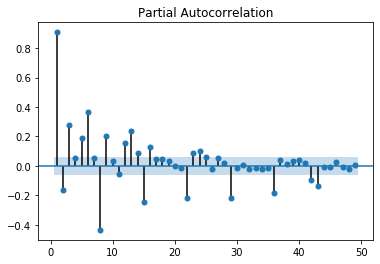

In [27]:
# PACF plot with no differencing
from statsmodels.graphics.tsaplots import plot_pacf

fig = plot_pacf(pge_daily, lags=range(1, 50), alpha=0.05)

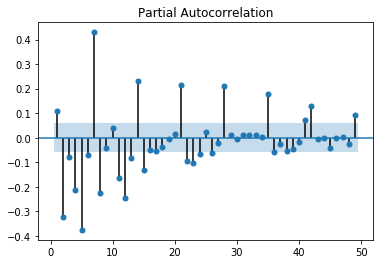

In [28]:
# PACF plot with order 1 difference
fig = plot_pacf(pge_daily_diff, lags=range(1,50), alpha=0.05)

In [29]:
# first order is best - has smalest std deviation

print(f"No diff      st. dev: {pge_daily.std()}")
print(f"Order 1 diff st. dev: {pge_daily_diff.std()}")
print(f"Order 2 diff st. dev: {pge_daily_diff.diff()[1:].std()}")

No diff      st. dev: 33526.333838402374
Order 1 diff st. dev: 14409.66889095814
Order 2 diff st. dev: 19258.307467271727


In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
# model = ARIMA(pge_daily,(7,1,1))
# results = model.fit()
# print(results.summary())

In [32]:
# print(results.aic)

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(f"ARIMA      AIC       RMSE")
aics = {}
for p in range(0,7):
    for q in range(0,4):
        mode = f"({p}, 1, {q})"
        model = ARIMA(pge_daily, (p,1,q)).fit()
        predicts = model.predict()
        rmse = sqrt(mean_squared_error(pge_daily[1:], predicts))

        aics[mode] = [model.aic, rmse]
        

aics_sorted = sorted(aics.items(), key=lambda x: x[1][0])

for k, v in aics_sorted:
    print(f"{k}: {round(v[0], 2)}  {round(v[1], 2)}")


#         run_sequence_plot(times, pge_daily, title="Statsmodels ARIMA (p={} q={})".format(p, q))
#         plt.plot(times, model.predict(start=1, end=365), label="AR model")
#         plt.legend()
#         plt.show();

ARIMA      AIC       RMSE
(6, 1, 3): 23367.67  286618.29
(6, 1, 2): 23404.05  286636.05
(5, 1, 3): 23424.89  286642.7
(5, 1, 2): 23475.57  286612.32
(4, 1, 3): 23519.36  286682.64
(6, 1, 1): 23628.62  286694.05
(4, 1, 2): 23651.52  286640.03
(6, 1, 0): 23730.86  286707.51
(5, 1, 0): 23734.17  286701.52
(5, 1, 1): 23734.53  286703.79
(3, 1, 3): 23736.62  286742.92
(4, 1, 1): 23827.71  286715.12
(2, 1, 3): 23838.3  286773.05
(3, 1, 2): 23848.4  286779.92
(1, 1, 3): 23849.36  286763.1
(0, 1, 3): 23850.32  286759.02
(2, 1, 2): 23856.22  286760.44
(1, 1, 2): 23857.58  286761.07
(3, 1, 1): 23862.23  286768.15
(2, 1, 1): 23865.58  286748.95
(4, 1, 0): 23896.65  286668.54
(0, 1, 2): 23904.85  286783.82
(3, 1, 0): 23946.02  286628.36
(2, 1, 0): 23950.96  286607.98
(1, 1, 1): 24012.49  286511.58
(0, 1, 1): 24052.66  286484.38
(1, 1, 0): 24070.39  286515.17
(0, 1, 0): 24081.16  286558.4


In [34]:
pdqs = [(p, 1, q) for p in range(0,7) for q in range(0,4)]
PDQs = [(P, 1, Q, 7) for P in range(0,2) for Q in range(0,2)]
sarima_models = {}
for pdq in pdqs:
    for PDQ in PDQs:
        sar = sm.tsa.statespace.SARIMAX(pge_daily,
                                        order=pdq,
                                        seasonal_order=PDQ)
        try:
            results = sar.fit()
            model_name = f"{pdq}x{PDQ}"
            ljungbox = results.test_serial_correlation('ljungbox', lags=None)
#             round(ljungbox[0][0][39], 2)
            
            sarima_models[model_name] = [round(results.aic, 2), round(ljungbox[0][0][39], 2)]
#         results1.summary()
#             print(f"{pdq}x{PDQ}:  {results.aic:10.2f}")
    

        except:
            continue

/Users/bks/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/bks/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/bks/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/bks/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/bks/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/bks/anaconda3/envs/metis/lib/pytho

In [35]:
sorted(sarima_models.items(), key=lambda x: x[1])

[('(6, 1, 3)x(1, 1, 1, 7)', [23165.15, 117.04]),
 ('(6, 1, 3)x(0, 1, 1, 7)', [23171.02, 90.66]),
 ('(5, 1, 3)x(1, 1, 1, 7)', [23175.59, 117.34]),
 ('(3, 1, 3)x(1, 1, 1, 7)', [23176.91, 111.23]),
 ('(4, 1, 3)x(1, 1, 1, 7)', [23178.2, 127.53]),
 ('(5, 1, 3)x(0, 1, 1, 7)', [23200.39, 135.13]),
 ('(4, 1, 3)x(0, 1, 1, 7)', [23201.88, 130.71]),
 ('(0, 1, 0)x(1, 1, 1, 7)', [23204.79, 225.28]),
 ('(3, 1, 3)x(0, 1, 1, 7)', [23210.84, 129.77]),
 ('(2, 1, 3)x(1, 1, 1, 7)', [23211.29, 126.52]),
 ('(2, 1, 3)x(0, 1, 1, 7)', [23233.05, 98.61]),
 ('(0, 1, 2)x(0, 1, 1, 7)', [23242.9, 215.58]),
 ('(0, 1, 1)x(0, 1, 1, 7)', [23244.23, 219.78]),
 ('(5, 1, 2)x(1, 1, 1, 7)', [23248.03, 115.86]),
 ('(6, 1, 2)x(1, 1, 1, 7)', [23249.37, 113.48]),
 ('(4, 1, 2)x(1, 1, 1, 7)', [23250.44, 119.09]),
 ('(2, 1, 2)x(1, 1, 1, 7)', [23250.66, 120.39]),
 ('(6, 1, 0)x(1, 1, 1, 7)', [23251.25, 114.96]),
 ('(6, 1, 1)x(1, 1, 1, 7)', [23251.82, 115.52]),
 ('(3, 1, 2)x(1, 1, 1, 7)', [23251.99, 117.91]),
 ('(1, 1, 3)x(1, 1, 1, 7

In [76]:
# fit SARIMA
sar = sm.tsa.statespace.SARIMAX(np.log(pge_daily),
                                order=(3,1,0), 
                                seasonal_order=(0,1,1,7))
# sar = sm.tsa.statespace.SARIMAX(np.log(pge_daily),
#                                 order=(0,1,1), 
#                                 seasonal_order=(0,1,1,52))

# results = sar.fit(max_iters = 2000, method = 'powell')
results = sar.fit(method='powell')
results.summary()

Optimization terminated successfully.
         Current function value: -2.026335
         Iterations: 3
         Function evaluations: 197


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                               PGE   No. Observations:                 1096
Model:             SARIMAX(3, 1, 0)x(0, 1, 1, 7)   Log Likelihood                2220.863
Date:                           Wed, 11 Dec 2019   AIC                          -4431.725
Time:                                   07:42:52   BIC                          -4406.765
Sample:                               01-01-2016   HQIC                         -4422.278
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1299      0.021      6.277      0.000       0.089       0.170
ar.L2         -0.1290      0.027     -4.814      0.000      -0.182      -0.077
ar.L3         -0.1527      0.025     -6.010      0.000      -0.203      -0.103
ma.S.L7       -0.9927      0.015    -66.154      0.000      -1.022      -0.963
sigma2         0.0010    3.3e-05     29.114      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       99.95   Jarque-Bera (JB):               214.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# pickle fitted model
results.save('sarima310_0117.pkl')

In [38]:
# Predict using in-sample data
predictions = np.exp(results.predict(start="2016-01-01", end="2018-12-31"))

predictions[0] = 2.617450e+05
predictions[7] = 2.824470e+05
# predictions[:30]

In [39]:
times = pd.date_range('2016-01-01', periods=1096, freq='D')

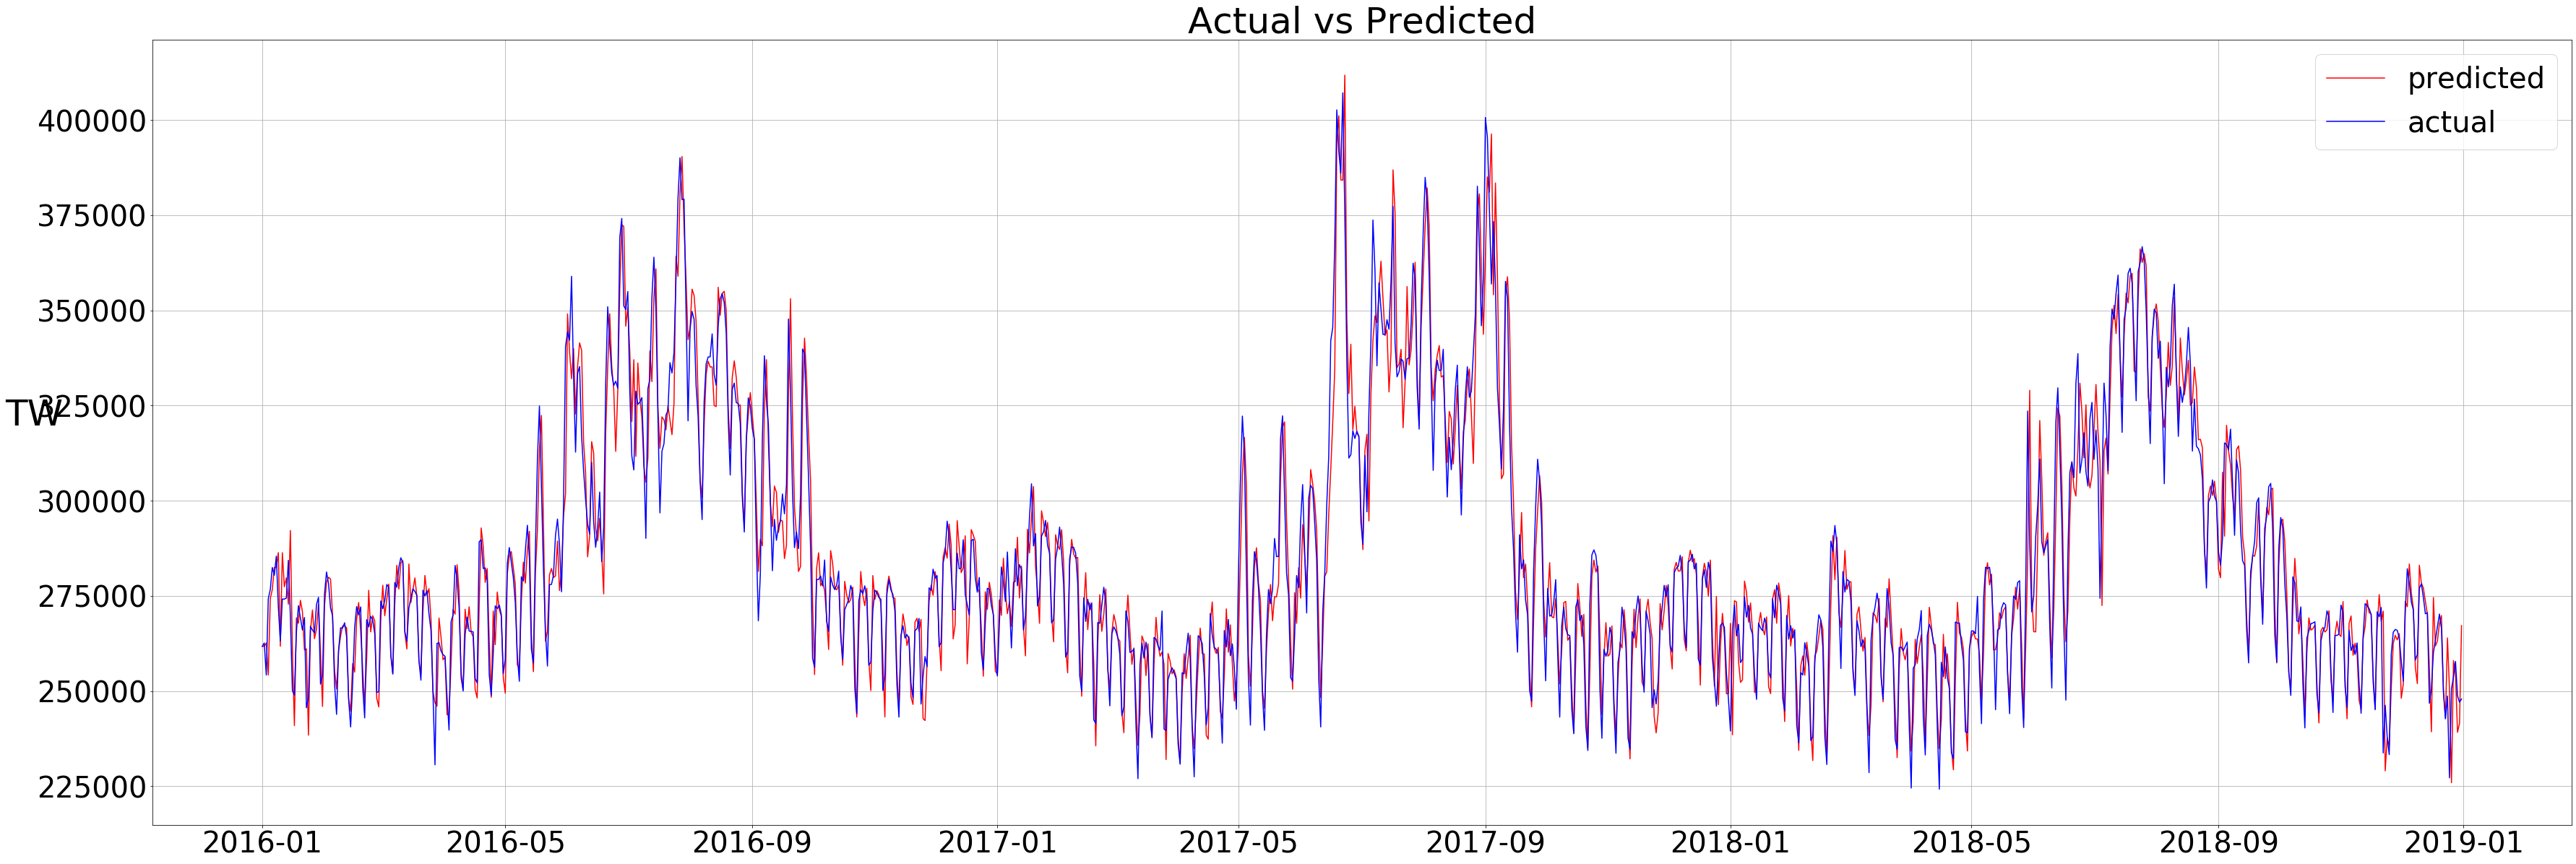

In [40]:
# run_sequence_plot(times[1:], pge_daily[1:], title="Predicted vs Actual")
# plt.plot(times[334:], results.predict(start="2017-12-01", end="2017-12-31"), label="Prediction")
# plt.plot(times[1:], results.predict(start="2017-01-02", end="2017-12-31"), label="Prediction")

plt.figure(figsize=(60,20))
plt.title('Actual vs Predicted',  fontsize=50)
plt.plot(times, predictions, color = 'red', label='predicted')
plt.plot(times, pge_daily, color = 'b', label='actual')
# plt.plot(new_times, new_predictions, color = 'r', label='pred')
# plt.plot(new_times, df_pge_2019_01_daily[:7], color = 'b', label='act')
plt.ylabel('TW', fontsize=50, rotation=0)
plt.legend(prop={'size': 40})
# plt.yticks(fontsize=10, rotation=90)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.grid()
plt.show();


#     plt.figure(figsbize=(60,20))
#     plt.plot(x, y, 'k-', label="actual")
# #     plt.figure(figsize=(30,10))
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.grid(alpha=0.3)
#     plt.legend();

In [60]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=times, y=pge_daily, name='Actual', opacity=0.7,
                         line=dict(color='royalblue', width=2)))
fig.add_trace(go.Scatter(x=times, y=predictions, name = 'Predicted', opacity=0.3,
                         line=dict(color='firebrick', width=2)))
fig.update_layout(title='Actual vs Predicted Power Usage',
                   yaxis_title='Power Usage')
fig.show()
fig.write_image("actual_vs_predicted.png")

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pge_daily, predictions))
print(f"rmse: {round(rmse, 2)}")

rmse: 9282.1


In [89]:
# predictions = np.exp(results.predict(start="2016-01-01", end="2018-12-31"))
new_predictions = np.exp(results.predict(start="2019-01-01", end="2019-01-31"))

In [92]:
# Trevor
new_predictions = np.exp(results.predict(start="2018-12-31", end="2019-01-07"))
new_times = pd.date_range('2018-12-31', periods=8, freq='D')


In [44]:
new_times = pd.date_range('2019-01-01', periods=31, freq='D')
new_times

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', freq='D')

In [45]:
df_2019_01.head()

,Dates,Date,HR,PGE,SCE,SDGE,VEA,CAISO
0,01/01/2019 00:00:00,01/01/2019,1,9844.671179,9928.052098,2088.467236,92.069633,21953.260145
1,01/01/2019 01:00:00,01/01/2019,2,9507.741740,9604.491114,1998.926841,92.659701,21203.819396
2,01/01/2019 02:00:00,01/01/2019,3,9251.864511,9340.809452,1934.058081,93.592488,20620.324532
3,01/01/2019 03:00:00,01/01/2019,4,9123.923264,9183.906987,1891.810439,97.051525,20296.692214
4,01/01/2019 04:00:00,01/01/2019,5,9156.257458,9170.713370,1898.783659,101.468592,20327.223079


In [46]:
df_pge_2019_01 = df_2019_01[['Dates', 'PGE']]
df_pge_2019_01.PGE = df_pge_2019_01.PGE.astype(float)
df_pge_2019_01.Dates =  pd.to_datetime(df_pge_2019_01.Dates)
df_pge_2019_01


/Users/bks/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Dates,PGE
0,2019-01-01 00:00:00,9844.671179
1,2019-01-01 01:00:00,9507.741740
2,2019-01-01 02:00:00,9251.864511
3,2019-01-01 03:00:00,9123.923264
4,2019-01-01 04:00:00,9156.257458
...,...,...
739,2019-01-31 19:00:00,12056.939722
740,2019-01-31 20:00:00,11702.312882
741,2019-01-31 21:00:00,11114.527035
742,2019-01-31 22:00:00,10403.982091


In [47]:
df_pge_2019_01.set_index('Dates', inplace=True)

In [48]:
df_pge_2019_01_daily = df_pge_2019_01.resample('D').sum()

In [49]:
# plt.figure(figsize=(60,20))
# plt.title('Actual vs Predicted',  fontsize=50)
# plt.plot(times, pge_daily, color = 'b', label='actual')
# plt.plot(new_times, new_predictions, color = 'r', label='predicted')
# # plt.plot(new_times, df_pge_2019_01_daily[:7], color = 'b', label='actual')
# plt.plot(new_times, df_pge_2019_01_daily, color = 'b')
# plt.ylabel('TW', fontsize=50, rotation=0)
# plt.legend(prop={'size': 40})
# plt.yticks(fontsize=40)
# plt.xticks(fontsize=40)
# plt.grid()
# plt.show();

In [73]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=times, y=pge_daily, name='Actual', opacity=0.7,
                         line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=times, y=predictions, name = 'Predicted', opacity=0.3,
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=new_times, y=new_predictions, name='Forecast',
                         line=dict(color='firebrick', width=2)))

# fig.add_trace(go.Scatter(x=new_times, y=df_pge_2019_01_daily.PGE, name='Actual 2019',
#                          line=dict(color='green', width=2)))

fig.update_layout(title='Actual vs Predicted Power Usage',
                   yaxis_title='Power Usage (Gigawatts)')
fig.show()
fig.write_image("forecast.png")

In [96]:
# Trevor

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=times, y=pge_daily, name='Actual', opacity=0.7,
                         line=dict(color='royalblue', width=2)))

fig.add_trace(go.Scatter(x=times, y=predictions, name = 'Predicted', opacity=0.3,
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=new_times, y=new_predictions, name='Forecast',
                         line=dict(color='firebrick', width=2)))

# fig.add_trace(go.Scatter(x=new_times, y=df_pge_2019_01_daily.PGE, name='Actual 2019',
#                          line=dict(color='green', width=2)))

fig.update_layout(title='Power Usage 1-Week Forecast',
                   yaxis_title='Power Usage')
fig.show()
fig.write_image("forecast.png")